In [ ]:
faces = face_cascade.detectMultiScale(images, 1.2, 2)
faces

array([[1445,  875,   86,   86],
       [ 320, 1238, 1361, 1361]], dtype=int32)

In [ ]:
image_copy = np.copy(images)

In [ ]:
scale=200

In [ ]:
# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
        
        # don't scale ouside of the frame!
  if (y-scale) < 0 and (x-scale) < 0:
    if (y-scale) < (x-scale):
      scale += (y-scale)
    else:
      scale += (x-scale)
  elif (y-scale) < 0 :
    scale += (y-scale)
  elif (x-scale) < 0:
    scale += (x-scale)

In [ ]:
roi = image_copy[y-scale:y+h+scale, x-scale:x+w+scale]
roi

array([[[245, 230, 204],
        [246, 231, 205],
        [246, 231, 205],
        ...,
        [243, 238, 177],
        [243, 238, 177],
        [243, 238, 177]],

       [[245, 230, 204],
        [246, 231, 205],
        [246, 231, 205],
        ...,
        [243, 238, 177],
        [243, 238, 177],
        [243, 238, 177]],

       [[245, 230, 204],
        [245, 230, 204],
        [246, 231, 205],
        ...,
        [243, 238, 177],
        [243, 238, 177],
        [243, 238, 177]],

       ...,

       [[244, 236, 223],
        [244, 236, 223],
        [244, 236, 223],
        ...,
        [ 92,  90, 180],
        [ 92,  90, 179],
        [ 90,  88, 177]],

       [[244, 236, 223],
        [244, 236, 223],
        [244, 236, 223],
        ...,
        [ 95,  90, 182],
        [ 94,  89, 181],
        [ 93,  88, 180]],

       [[244, 236, 223],
        [244, 236, 223],
        [244, 236, 223],
        ...,
        [100,  87, 189],
        [100,  87, 189],
        [ 96,  85, 187]]

In [ ]:
roi_color = np.copy(roi)

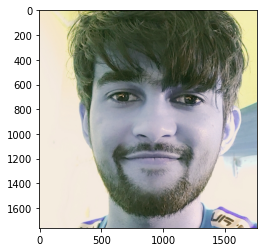

In [ ]:
plt.imshow(roi_color)

In [ ]:
#roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

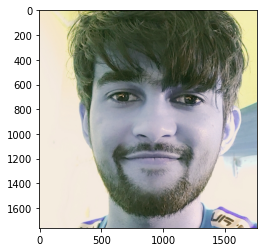

In [ ]:
plt.imshow(roi)

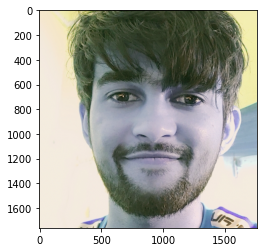

In [ ]:
roi = roi/255.0
plt.imshow(roi)

In [ ]:
roi.shape

(1761, 1761, 3)

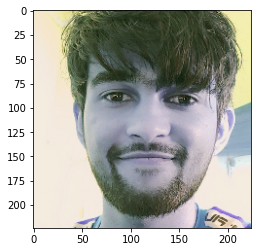

In [ ]:
h, w = roi.shape[0],roi.shape[1]
        
shape_before_resize = roi.shape
        
roi = cv2.resize(roi, (img_size, img_size))
        
shape_after_resize = roi.shape
plt.imshow(roi)

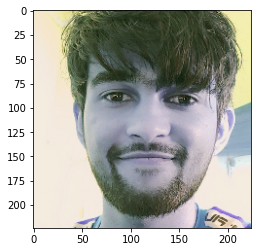

In [ ]:
 # how much the image was scaled with
        # will use to resize and fit to the webcam image
scaling_factor = shape_before_resize[0]/shape_after_resize[0]
        
roi_color = cv2.resize(roi_color, (img_size, img_size))
        # Make copy for displaying keypoint over
roi_copy = np.copy(roi)
plt.imshow(roi_copy)

In [ ]:
roi = roi.reshape(roi.shape[0], roi.shape[1],3)

In [ ]:
 # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H
roi = roi.transpose((2, 0, 1))
        
roi = torch.from_numpy(roi)
roi = roi.type(torch.FloatTensor)

In [ ]:
roi.unsqueeze_(0)

tensor([[[[0.9647, 0.9647, 0.9647,  ..., 0.9529, 0.9626, 0.9529],
          [0.9647, 0.9647, 0.9647,  ..., 0.9608, 0.9613, 0.9585],
          [0.9647, 0.9641, 0.9620,  ..., 0.9642, 0.9529, 0.9546],
          ...,
          [0.9569, 0.9569, 0.9569,  ..., 0.4511, 0.4499, 0.4482],
          [0.9569, 0.9569, 0.9569,  ..., 0.4091, 0.3801, 0.4398],
          [0.9569, 0.9569, 0.9569,  ..., 0.3779, 0.3917, 0.3611]],

         [[0.9059, 0.9098, 0.9098,  ..., 0.9333, 0.9312, 0.9333],
          [0.9059, 0.9059, 0.9098,  ..., 0.9294, 0.9333, 0.9306],
          [0.9059, 0.9053, 0.9038,  ..., 0.9328, 0.9333, 0.9350],
          ...,
          [0.9255, 0.9255, 0.9255,  ..., 0.4886, 0.5294, 0.5723],
          [0.9255, 0.9255, 0.9255,  ..., 0.3911, 0.4141, 0.5086],
          [0.9255, 0.9255, 0.9255,  ..., 0.3112, 0.3355, 0.3468]],

         [[0.8039, 0.8000, 0.8000,  ..., 0.6941, 0.6959, 0.6941],
          [0.8039, 0.8039, 0.8000,  ..., 0.6941, 0.6969, 0.6941],
          [0.8039, 0.8033, 0.8006,  ..., 0

In [ ]:
roi.shape

torch.Size([1, 3, 224, 224])

In [ ]:
output_pts = net(roi)
output_pts.shape

RuntimeError: ignored

In [ ]:
output_pts = output_pts.view(68, -1)

In [ ]:
output_pts.shape

torch.Size([68, 2])

In [ ]:
# undo normalization of keypoints
output_pts = output_pts.detach().numpy()   
output_pts = output_pts*(roi_copy.shape[0]/4)+roi_copy.shape[0]/2
for pts in output_pts:

  pts[0] = x-scale+pts[0]*scaling_factor
  pts[1] = y-scale+pts[1]*scaling_factor

In [ ]:
len(output_pts)

68

In [ ]:
color = (0,255,0)

In [ ]:
for i in range(len(output_pts)):
  if (i != 16 and i != 21 and i != 26 and i != 30 and i != 35 and i < 68) :
    pt1 = (output_pts[i][0], output_pts[i][1])
                
    if i == 17:
                    # left eyebrow
      color = (0,100,0)
    elif i == 22:
                    # right eyebrow
                    color = (0,100,0)
    elif i == 27:
                    # nose stem
      color = (255,255,0)
    elif i == 31:
                    # nose tip
      color = (255,255,0)
    elif i == 36:
                    # left eye
      color = (0,250,154)
    elif i == 42:
                    # right eye
      color = (0,250,154)
    elif i == 48:
                    # lips
      color = (255,20,147)
                     
    if i == 41:
      pt2 = (output_pts[36][0], output_pts[36][1])
    elif i == 47:
      pt2 = (output_pts[42][0], output_pts[42][1])
    elif i == 67:
      pt2 = (output_pts[60][0], output_pts[60][1])
    else:
      pt2 = (output_pts[i+1][0], output_pts[i+1][1])
                    
    cv2.line(image_copy, pt1, pt2, color, thickness=50, lineType=10, shift=0) 

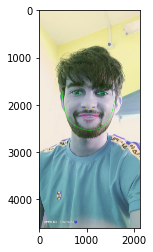

In [ ]:
plt.imshow(image_copy)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive/My Drive/P1_Facial_Keypoints

/content/drive/My Drive/P1_Facial_Keypoints


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Import the required modules for webacm
import cv2
from IPython.display import clear_output
import time
import PIL.Image
from io import BytesIO as StringIO
import IPython.display

In [ ]:
import torch
from models import resnet18_grayscale

img_size = 224
net = resnet18_grayscale()

model_dir = 'saved_models/'
model_name = 'resnet18_gray_epochs46_bs64_vloss0.00524.pt'

net.load_state_dict(torch.load(model_dir+model_name))

# print out net
net.eval()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


resnet18_grayscale(
  (resnet18): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [ ]:

# load in a haar cascade classifier for detecting frontal face
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

In [ ]:
def detect_faces(img):
    
    faces = face_cascade.detectMultiScale(img, 1.2, 2)
    
    # make a copy of the original image to plot detections on
    image_with_detections = img.copy()
        
    for (x,y,w,h) in faces:
        # draw a rectangle around each detected face
        # you may also need to change the width of the rectangle drawn depending on image resolution
        cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0), 3) 

    return image_with_detections

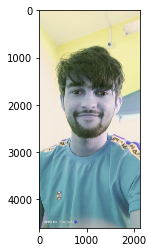

In [ ]:
 #load in sunglasses image with cv2 and IMREAD_UNCHANGED
images = cv2.imread('images/Self.jpg', cv2.IMREAD_UNCHANGED)

# plot our image
plt.imshow(images)

In [ ]:
a=detect_faces(images)

In [ ]:

#Use 'jpeg' instead of 'png' (~5 times faster)
def showarray(a, fmt='jpeg'):
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

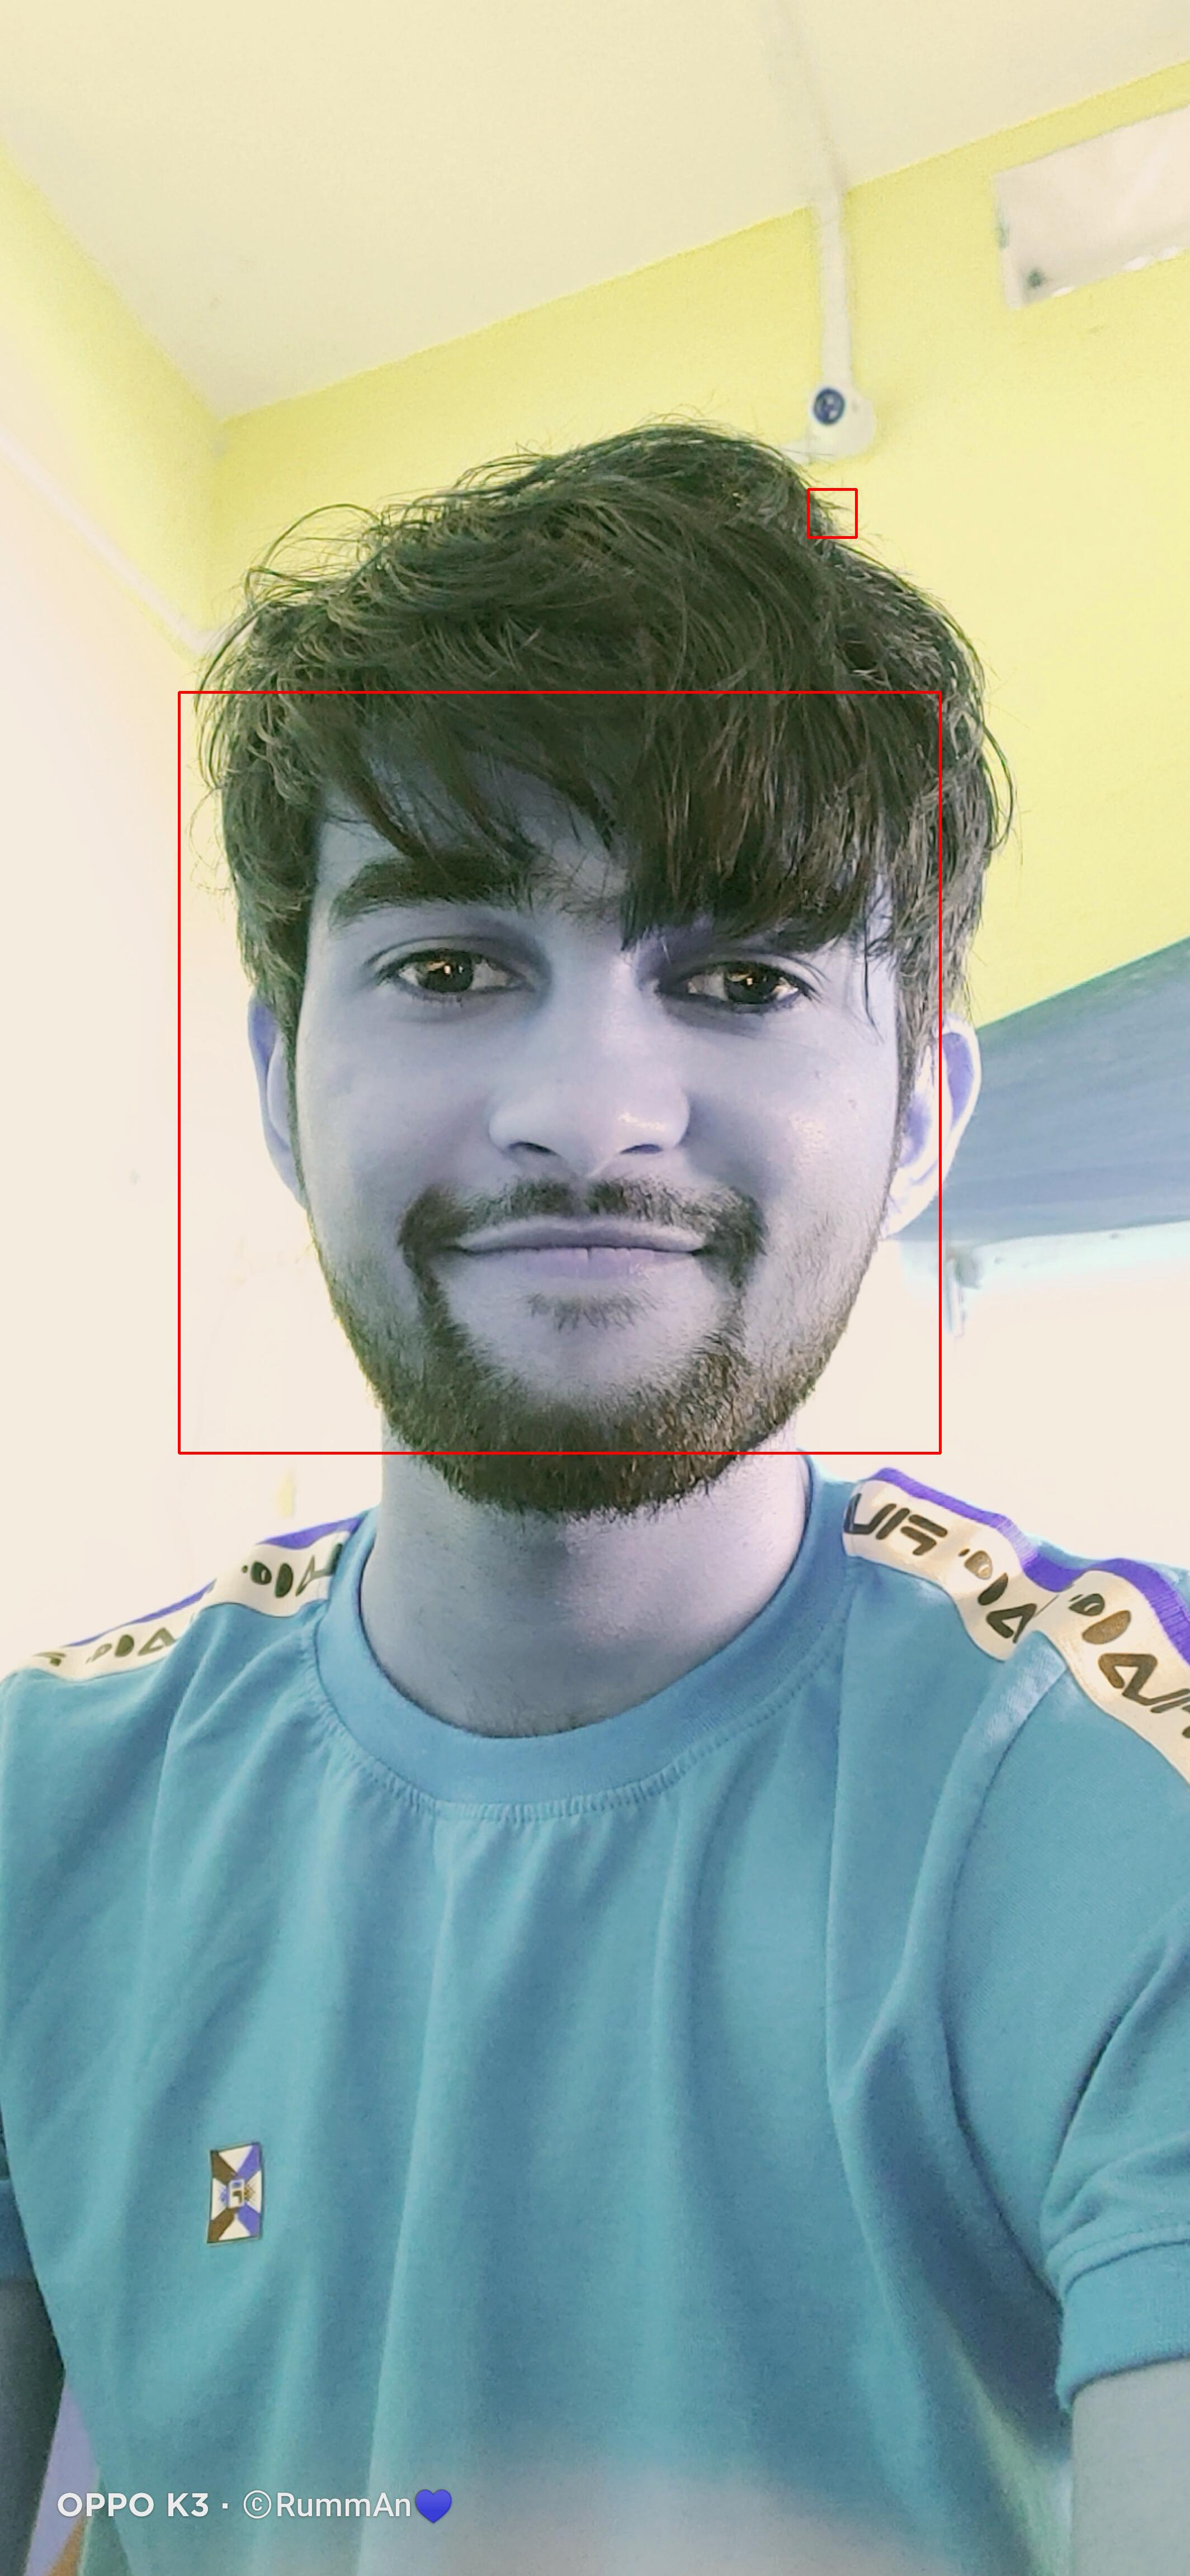

In [ ]:
showarray(a)

In [ ]:
def detect_keypoints(img, scale):
    
    faces = face_cascade.detectMultiScale(img, 1.2, 2)
    
    if len(faces) == 0:
        return img
    
    image_copy = np.copy(img)
    
    # loop over the detected faces from your haar cascade
    for (x,y,w,h) in faces:
        
        # don't scale ouside of the frame!
        if (y-scale) < 0 and (x-scale) < 0:
            if (y-scale) < (x-scale):
                scale += (y-scale)
            else:
                scale += (x-scale)
        elif (y-scale) < 0 :
            scale += (y-scale)
        elif (x-scale) < 0:
            scale += (x-scale)

        # Select the region of interest that is the face in the image 
        roi = image_copy[y-scale:y+h+scale, x-scale:x+w+scale]

        roi_color = np.copy(roi)
        
        ## Convert the face region from RGB to grayscale
        roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
        ## Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
        roi = roi/255.0
        ## Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
        
        h, w = roi.shape
        
        shape_before_resize = roi.shape
        
        roi = cv2.resize(roi, (img_size, img_size))
        
        shape_after_resize = roi.shape
        
        # how much the image was scaled with
        # will use to resize and fit to the webcam image
        scaling_factor = shape_before_resize[0]/shape_after_resize[0]
        
        roi_color = cv2.resize(roi_color, (img_size, img_size))
        # Make copy for displaying keypoint over
        roi_copy = np.copy(roi)
        
        ## Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
        
        # if image has no grayscale color channel, add one
        if(len(roi.shape) == 2):
            # add that third color dim
            roi = roi.reshape(roi.shape[0], roi.shape[1], 1)
        
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        roi = roi.transpose((2, 0, 1))
        
        roi = torch.from_numpy(roi)
        roi = roi.type(torch.FloatTensor)
        
        roi.unsqueeze_(0)
        ## Make facial keypoint predictions using your loaded, trained network     
        ## perform a forward pass to get the predicted facial keypoints
        
        # forward pass to get net output
        output_pts = net(roi)
        # reshape to size x 68 x 2 pts
        output_pts = output_pts.view(68, -1)
        
        # undo normalization of keypoints
        output_pts = output_pts.detach().numpy()   
        output_pts = output_pts*(roi_copy.shape[0]/4)+roi_copy.shape[0]/2
        for pts in output_pts:
            pts[0] = x-scale+pts[0]*scaling_factor
            pts[1] = y-scale+pts[1]*scaling_factor
        
        ## Draw mask
       
        color = (0,255,0)
        
        for i in range(len(output_pts)):
            if (i != 16 and i != 21 and i != 26 and i != 30 and i != 35 and i < 68) :
                pt1 = (output_pts[i][0], output_pts[i][1])
                
                if i == 17:
                    # left eyebrow
                    color = (0,100,0)
                elif i == 22:
                    # right eyebrow
                    color = (0,100,0)
                elif i == 27:
                    # nose stem
                    color = (255,255,0)
                elif i == 31:
                    # nose tip
                    color = (255,255,0)
                elif i == 36:
                    # left eye
                    color = (0,250,154)
                elif i == 42:
                    # right eye
                    color = (0,250,154)
                elif i == 48:
                    # lips
                    color = (255,20,147)
                     
                if i == 41:
                    pt2 = (output_pts[36][0], output_pts[36][1])
                elif i == 47:
                    pt2 = (output_pts[42][0], output_pts[42][1])
                elif i == 67:
                    pt2 = (output_pts[60][0], output_pts[60][1])
                else:
                    pt2 = (output_pts[i+1][0], output_pts[i+1][1])
                    
                cv2.line(image_copy, pt1, pt2, color, thickness=55, lineType=8, shift=0) 
                
        return image_copy

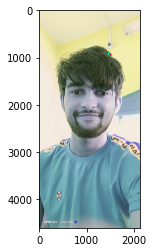

In [ ]:
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    
    #flip image for natural viewing
    frame = cv2.flip(frame, 1)
    
    return frame

In [ ]:
import time

cap = cv2.VideoCapture(0)
save_video = True

if save_video:
    # https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/
    # Default resolutions of the frame are obtained.The default resolutions are system dependent.
    # We convert the resolutions from float to integer.
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    # Define the codec and create VideoWriter object.The output is stored in 'outpput.avi' file.
    out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 4, (frame_width,frame_height))

try:
    while(True):
        #start_time = time.time()
        
        # Capture frame-by-frame
        frame = get_frame(cap)

        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                
        frame = detect_keypoints(frame, 30)
        
        # write to video file
        if save_video:
            out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
        
        showarray(frame)
         
        clear_output(wait=True)
        
        
        #print("FPS: ", 1.0 / (time.time() - start_time)) # FPS = 1 / time to process loop

        
except KeyboardInterrupt:
    cap.release()
    if save_video:
        out.release()
    print("Stream stopped")

error: ignored